# Full Adder
In the following is a quantum circuit acting as a full adder. 

## 1. Import necessary libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

## 2. Create the circuit
2.1 crate a circuit with eight qubit and two classical bit

2.2 Apply AND to A and B

    -> CCNOT of A and B

2.3 Apply XOR to A and B

    -> CNOT of A and CNOT of B

2.4 Apply XOR to C and first XOR, giving the sum

    -> CNOT of C and CNOT of first XOR

2.5 Apply AND to C and first XOR

    -> CCNOT of C and first XOR

2.6 Apply OR of first AND and second AND

    ->NOT CCNOT of NOT first AND and NOT second AND
    

(Optional: add barriers and draw the circuit)

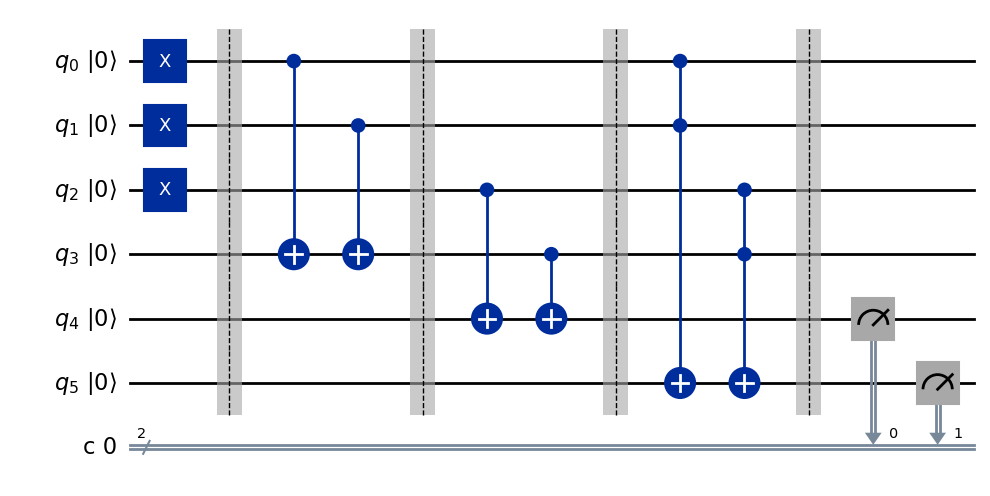

In [2]:
qc = QuantumCircuit(6, 2)
# q0 = Input A
# q1 = Input B
# q2 = Input C_in
# q3 = Intermediate value (auxiliary qubit)
# q4 = Output Sum
# q5 = Output C_out

qc.x(0)     # comment line to set q0 = |0> 
qc.x(1)     # comment line to set q1 = |0>
qc.x(2)     # comment line to set q2 = |0>

qc.barrier()
# Auxiliary qubit
# q3 = A ⊕ B
qc.cx(0, 3)
qc.cx(1, 3)  

qc.barrier()
# Output sum
# q4 = (A ⊕ B) ⊕ Carry-in
qc.cx(2, 4)
qc.cx(3, 4)

qc.barrier()
# Output C_out
# A ∧ B → in q5
qc.ccx(0, 1, 5)
# (A⊕B) ∧ C_in
qc.ccx(3, 2, 5)

qc.barrier()
qc.measure(4, 0)
qc.measure(5, 1)

qc.draw('mpl', initial_state=True)

## 3. Simulate the circuit
3.1 Select the simulator

3.2 Transpile the quantum circuit in elementary gates

3.3 Run the circuit

3.4 Show the results

In [4]:
simulator = AerSimulator()

transpile_circuit = transpile(qc, simulator)

result = simulator.run(transpile_circuit, shots=1000).result()

counts = result.get_counts()
print("Results:", counts)

Results: {'11': 1000}
